In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def one_run(q, Q, eps, narms, itrs):
    rewardarr = []
    N = np.zeros(narms)
    for t in range(itrs):
        if np.random.rand() < eps:
            arm = np.random.randint(narms)
        else:
            maxidx = np.flatnonzero(Q == np.max(Q))
            arm = np.random.choice(maxidx)
        reward = np.random.normal(q[arm],1)
        rewardarr.append(reward)
        N[arm] += 1
        Q[arm] += 1/N[arm]*(reward-Q[arm])
    return rewardarr

In [23]:
narms = 10
itrs = 1000
runs = 2000
listavgrewards = []

In [24]:
for eps in [0, 0.01, 0.1, 1]:
    avgreward = np.zeros(itrs)
    for run in range(runs):
        q = np.random.randn(narms)
        Q = np.zeros(narms)
        runreward = one_run(q, Q, eps, narms, itrs)
        avgreward += runreward
    avgreward /= runs
    listavgrewards.append(avgreward)

In [25]:
avgreward = np.zeros(itrs)
eps = 0
for run in range(runs):
    q = np.random.randn(narms)
    Q = np.ones(narms)*5
    runreward = one_run(q, Q, eps, narms, itrs)
    avgreward += runreward
avgreward /= runs
listavgrewards.append(avgreward)

In [26]:
avgreward = np.zeros(itrs)
c = 2
for run in range(runs):
    q = np.random.randn(narms)
    Q = np.zeros(narms)
    runreward = []
    N = np.zeros(narms)
    for t in range(itrs):
        arm = np.argmax(Q + c*np.sqrt(np.log(t+1)/N))
        reward = np.random.normal(q[arm],1)
        runreward.append(reward)
        N[arm] += 1
        Q[arm] += 1/N[arm]*(reward-Q[arm])
    avgreward += runreward

avgreward /= runs
listavgrewards.append(avgreward)

C:\Users\HP\AppData\Local\Temp\ipykernel_19156\681976218.py:9: RuntimeWarning: invalid value encountered in divide
  arm = np.argmax(Q + c*np.sqrt(np.log(t+1)/N))
C:\Users\HP\AppData\Local\Temp\ipykernel_19156\681976218.py:9: RuntimeWarning: divide by zero encountered in divide
  arm = np.argmax(Q + c*np.sqrt(np.log(t+1)/N))


In [27]:
print(len(listavgrewards))

6


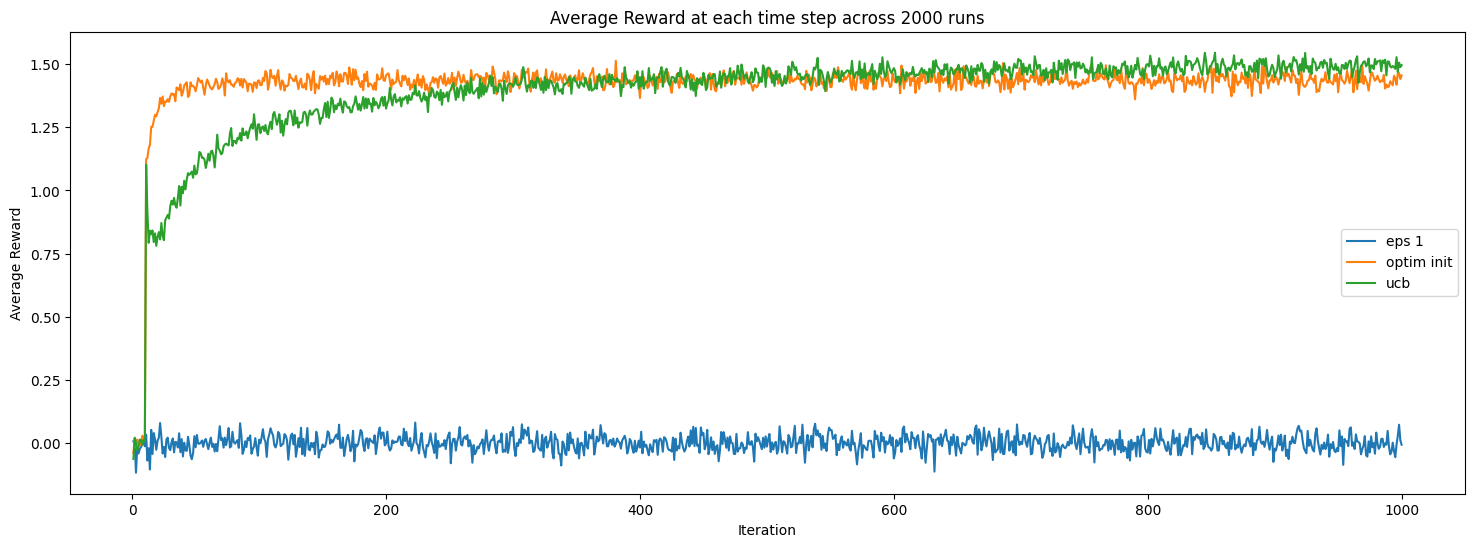

In [28]:
plt.figure(figsize=(18,6))
# plt.plot(range(1,itrs+1), listavgrewards[0], label='eps 0')
# plt.plot(range(1,itrs+1), listavgrewards[1], label='eps 0.01')
# plt.plot(range(1,itrs+1), listavgrewards[2], label='eps 0.1')
plt.plot(range(1,itrs+1), listavgrewards[3], label='eps 1')
plt.plot(range(1,itrs+1), listavgrewards[4], label='optim init')
plt.plot(range(1,itrs+1), listavgrewards[5], label='ucb')
plt.title(f"Average Reward at each time step across {runs} runs")
plt.xlabel("Iteration")
plt.ylabel("Average Reward")
plt.legend()
plt.show()

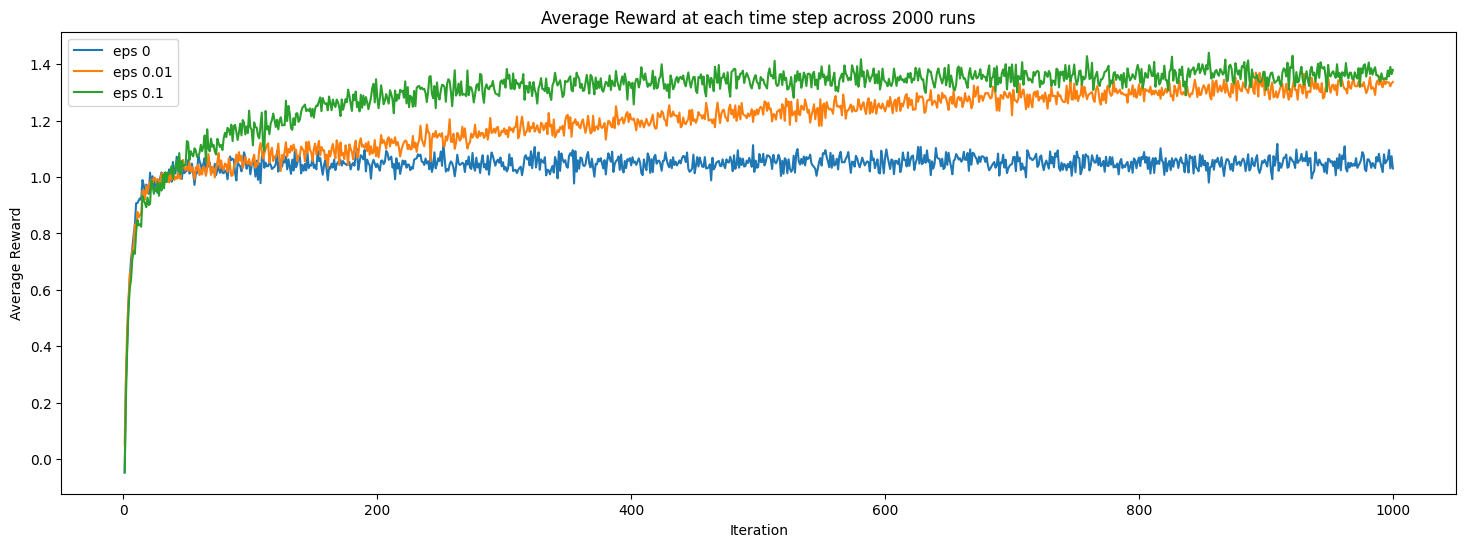

In [29]:
plt.figure(figsize=(18,6))
plt.plot(range(1,itrs+1), listavgrewards[0], label='eps 0')
plt.plot(range(1,itrs+1), listavgrewards[1], label='eps 0.01')
plt.plot(range(1,itrs+1), listavgrewards[2], label='eps 0.1')
plt.title(f"Average Reward at each time step across {runs} runs")
plt.xlabel("Iteration")
plt.ylabel("Average Reward")
plt.legend()
plt.show()